### **Importing Dataset**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving large_twitch_features.csv to large_twitch_features.csv


### **Importing libraries**

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('large_twitch_features.csv')

### **Data Pre-processing**

In [4]:
df.head(7)

,views,mature,life_time(hr),created_at,updated_at,numeric_id,dead_account,language,affiliate
0,7879,1,969,2/16/2016,10/12/2018,0,0,EN,1
1,500,0,2699,5/19/2011,10/8/2018,1,0,EN,0
2,382502,1,3149,2/27/2010,10/12/2018,2,0,EN,1
3,386,0,1344,1/26/2015,10/1/2018,3,0,EN,0
4,2486,0,1784,11/22/2013,10/11/2018,4,0,EN,0
5,4987,1,1288,4/3/2015,10/12/2018,5,0,EN,1
6,234,0,358,9/14/2017,9/7/2018,6,0,EN,0


In [5]:
df.tail(7)

,views,mature,life_time(hr),created_at,updated_at,numeric_id,dead_account,language,affiliate
168107,10752,0,2241,8/19/2012,10/8/2018,168107,0,EN,0
168108,10057,1,851,6/13/2016,10/12/2018,168108,0,EN,1
168109,4965,0,810,7/20/2016,10/8/2018,168109,0,EN,0
168110,4128,1,2080,1/31/2013,10/12/2018,168110,0,EN,0
168111,3545,0,1797,11/8/2013,10/10/2018,168111,0,EN,1
168112,892736,1,2135,12/7/2012,10/12/2018,168112,0,EN,0
168113,791,0,2005,1/22/2013,7/20/2018,168113,0,EN,0


In [6]:
df.shape

(168114, 9)

In [7]:
df.isnull().sum()

views            0
mature           0
life_time(hr)    0
created_at       0
updated_at       0
numeric_id       0
dead_account     0
language         0
affiliate        0
dtype: int64

<Axes: xlabel='numeric_id', ylabel='views'>

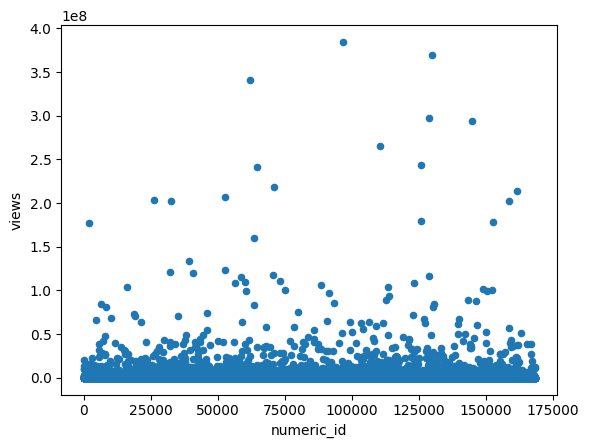

In [8]:
# df.hist(bins=50, figsize=(15,10))
# plt.show()

df.plot.scatter(x="numeric_id", y="views")

<Axes: xlabel='views', ylabel='affiliate'>

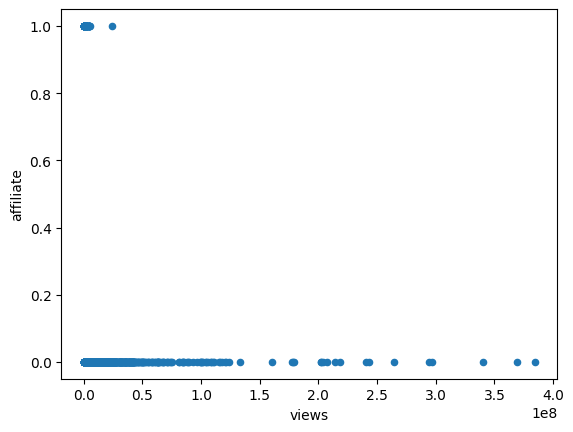

In [9]:
df.plot.scatter(x="views", y="affiliate")

In [10]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,views,mature,life_time(hr),numeric_id,dead_account,affiliate
views,1.000000,-0.021052,0.053711,0.001807,-0.009929,-0.048112
mature,-0.021052,1.000000,0.018040,-0.002002,-0.067051,0.179874
life_time(hr),0.053711,0.018040,1.000000,-0.003837,-0.022837,-0.122796
numeric_id,0.001807,-0.002002,-0.003837,1.000000,0.000865,0.001466
dead_account,-0.009929,-0.067051,-0.022837,0.000865,1.000000,-0.167585
affiliate,-0.048112,0.179874,-0.122796,0.001466,-0.167585,1.000000


In [11]:
df = df.drop(['created_at','updated_at','language','dead_account'],axis=1)

In [12]:
df

,views,mature,life_time(hr),numeric_id,affiliate
0,7879,1,969,0,1
1,500,0,2699,1,0
2,382502,1,3149,2,1
3,386,0,1344,3,0
4,2486,0,1784,4,0
...,...,...,...,...,...
168109,4965,0,810,168109,0
168110,4128,1,2080,168110,0
168111,3545,0,1797,168111,1
168112,892736,1,2135,168112,0


In [13]:
x = df.iloc[:,2:]
x

,life_time(hr),numeric_id,affiliate
0,969,0,1
1,2699,1,0
2,3149,2,1
3,1344,3,0
4,1784,4,0
...,...,...,...
168109,810,168109,0
168110,2080,168110,0
168111,1797,168111,1
168112,2135,168112,0


In [14]:
x.insert(0,column="views",value=df.iloc[:,1:2].values)

In [15]:
x

,views,life_time(hr),numeric_id,affiliate
0,1,969,0,1
1,0,2699,1,0
2,1,3149,2,1
3,0,1344,3,0
4,0,1784,4,0
...,...,...,...,...
168109,0,810,168109,0
168110,1,2080,168110,0
168111,0,1797,168111,1
168112,1,2135,168112,0


### **Target Column**

In [16]:
y = df.iloc[:,1:2]
y

,mature
0,1
1,0
2,1
3,0
4,0
...,...
168109,0
168110,1
168111,0
168112,1


### **Scaling the Data**

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
standard_scaler = StandardScaler()
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
x = standard_scaler.fit_transform(x)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
x

array([[ 1.06166697, -0.80035002, -1.7320405 ,  1.03033241],
       [-0.94191495,  1.61685712, -1.7320199 , -0.97056056],
       [ 1.06166697,  2.24561043, -1.73199929,  1.03033241],
       ...,
       [-0.94191495,  0.35655606,  1.73199929,  1.03033241],
       [ 1.06166697,  0.82881965,  1.7320199 , -0.97056056],
       [-0.94191495,  0.64717981,  1.7320405 , -0.97056056]])

In [20]:
y

array([1, 0, 1, ..., 0, 1, 0])

### **Training and Testing**

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y)

In [22]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')

In [23]:
svc.fit(xtrain, ytrain)  

SVC()

In [24]:
y_pred = svc.predict(xtest)

In [25]:
y_pred

array([1, 1, 0, ..., 0, 1, 1])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22180
           1       1.00      1.00      1.00     19849

    accuracy                           1.00     42029
   macro avg       1.00      1.00      1.00     42029
weighted avg       1.00      1.00      1.00     42029



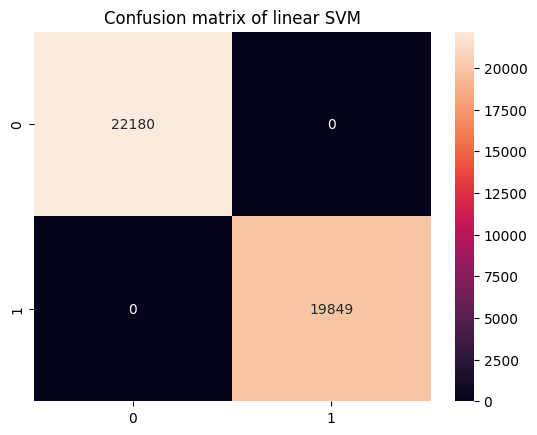

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

cm = confusion_matrix(ytest,y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of linear SVM') # fmt='d' formats the numbers as digits, which means integers

print(classification_report(ytest,y_pred))

In [27]:
from sklearn.metrics import accuracy_score
classifier_prediction = svc.predict(xtest)
print(accuracy_score(ytest,classifier_prediction))

1.0
